In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, f_oneway
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
# Wczytanie danych do DataFrame
file_path = 'HistoricalQuotes.csv'
data = pd.read_csv(file_path)
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
# Usuń spacje z nazw kolumn
data.columns = data.columns.str.strip()

# Usuń znak dolara i konwertuj na liczby zmiennoprzecinkowe
data['Close/Last'] = data['Close/Last'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['Open'] = data['Open'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['High'] = data['High'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['Low'] = data['Low'].str.strip().str.replace(r'\$', '', regex=True).astype(float)


In [6]:
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200,257.2600,278.4100,256.3700
1,02/27/2020,273.5200,80151380,281.1000,286.0000,272.9600
2,02/26/2020,292.6500,49678430,286.5300,297.8800,286.5000
3,02/25/2020,288.0800,57668360,300.9500,302.5300,286.1300
4,02/24/2020,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771


In [7]:
# Wyznaczanie podstawowych parametrów statystycznych
basic_stats = data.describe()
print("Podstawowe parametry statystyczne:")
print(basic_stats)


Podstawowe parametry statystyczne:
        Close/Last        Volume         Open         High          Low
count  2518.000000  2.518000e+03  2518.000000  2518.000000  2518.000000
mean    114.769522  7.258009e+07   114.728443   115.766415   113.690582
std      60.662405  5.663113e+07    60.546893    61.134456    60.085105
min      29.835700  1.136205e+07    29.392800    29.928600    28.464300
25%      66.822475  3.053026e+07    66.877150    67.475300    66.372950
50%     101.090000  5.295469e+07   101.115000   102.085000   100.350000
75%     154.630000  9.861006e+07   154.610000   155.735000   153.325000
max     327.200000  4.624423e+08   324.740000   327.850000   323.350000


In [8]:
# Upewnij się, że kolumna 'Date' ma typ datetime
data['Date'] = pd.to_datetime(data['Date'])

# Dodaj kolumnę z rokiem
data['Year'] = data['Date'].dt.year

# Wybierz dane z 2020 roku i wcześniejsze
data_2020 = data[data['Year'] == 2020]['Close/Last']
data_2019 = data[data['Year'] < 2020]['Close/Last']
data

,Date,Close/Last,Volume,Open,High,Low,Year
0,2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700,2020
1,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,2020
2,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,2020
3,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,2020
4,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,2020
...,...,...,...,...,...,...,...
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,2010
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,2010
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,2010
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,2010


## Testy parametryczne: t-studenta

### Sprawdzenie normalności rozkładu 
Jedynym warunkiem jest normalność rozkładu zmiennych oraz brak istotnych różnic między wariancjami

Test t jest najbardziej powszechnie stosowaną metodą oceny różnic między średnimi w dwóch grupach.

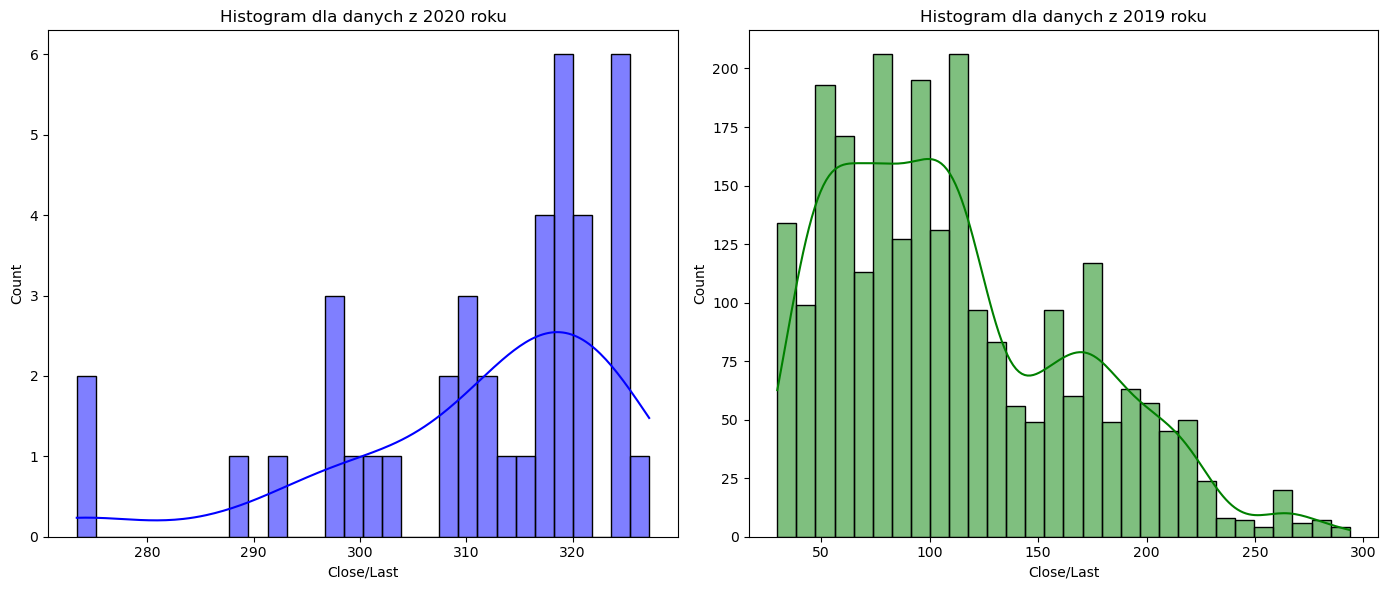

Test normalności dla danych z 2020 roku: Statystyka = 0.8593702315898601, p-value = 0.00015315563250292455
Test normalności dla danych z 2019 roku: Statystyka = 0.9424814442238691, p-value = 5.0134010704408965e-30


In [10]:

# Tworzenie histogramów dla danych z 2020 i 2019 roku
plt.figure(figsize=(14, 6))

# Histogram dla danych z 2020 roku
plt.subplot(1, 2, 1)
sns.histplot(data_2020, kde=True, color='blue', bins=30)
plt.title('Histogram dla danych z 2020 roku')

# Histogram dla danych z 2019 roku
plt.subplot(1, 2, 2)
sns.histplot(data_2019, kde=True, color='green', bins=30)
plt.title('Histogram dla danych z 2019 roku')

plt.tight_layout()
plt.show()

# Test normalności (np. test Shapiro-Wilka)
shapiro_test_2020 = stats.shapiro(data_2020)
shapiro_test_2019 = stats.shapiro(data_2019)

print(f"Test normalności dla danych z 2020 roku: Statystyka = {shapiro_test_2020[0]}, p-value = {shapiro_test_2020[1]}")
print(f"Test normalności dla danych z 2019 roku: Statystyka = {shapiro_test_2019[0]}, p-value = {shapiro_test_2019[1]}")

Test normalności dla danych z 2020 roku:
Statystyka testu: 0.85937
p-value: 0.000153
Interpretacja:
Test Shapiro-Wilka ma hipotezę zerową, która mówi, że dane mają rozkład normalny. Jeśli wartość p jest mniejsza niż wybrany poziom istotności (zwykle 0.05), odrzucamy hipotezę zerową i wnioskujemy, że dane nie mają rozkładu normalnego.
Wartość p = 0.000153 jest znacznie mniejsza niż 0.05, więc odrzucamy hipotezę o normalności i stwierdzamy, że dane z 2020 roku nie mają rozkładu normalnego.


Test normalności dla danych z 2019 roku:
Statystyka testu: 0.94248
p-value: 5.0134e-30 (czyli bardzo bliskie 0)
Interpretacja:
Tak jak w poprzednim przypadku, wartość p jest znacznie mniejsza niż 0.05. Wartość p jest bliska zeru, co oznacza, że odrzucamy hipotezę o normalności i wnioskujemy, że dane z 2019 roku również nie mają rozkładu normalnego.

W obu przypadkach (2019 i 2020 rok) p-value jest znacznie mniejsze niż 0.05, co prowadzi do wniosku, że dane nie są rozkładem normalnym. Oznacza to, że nie możemy przyjąć założenia o normalności tych danych, co może sugerować, że rozkład cen akcji w tych latach jest inny

## Test Levene’a
Test Levene’a sprawdza, czy wariancje w dwóch (lub więcej) grupach są równe. Hipotezy dla tego testu są następujące:

Hipoteza zerowa (H₀): Wariancje są równe.
Hipoteza alternatywna (H₁): Wariancje są różne.

In [17]:
# Przeprowadź test Levene’a dla danych z 2020 i 2019 roku
levene_stat, p_value_levene = stats.levene(data_2020, data_2019)

# Wydrukuj wyniki
print(f"Statystyka testu Levene’a: {levene_stat}")
print(f"p-value testu Levene’a: {p_value_levene}")

# Sprawdzanie hipotezy zerowej
if p_value_levene < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między wariancjami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Wariancje są równe.")

Statystyka testu Levene’a: 39.08041628342675
p-value testu Levene’a: 4.762349243578808e-10
Odrzucamy hipotezę zerową: Istnieje istotna różnica między wariancjami.


In [33]:
# Testy nieparametryczne: test Manna-Whitneya (porównanie median dwóch okresów)
stat_mw, p_value_mw = mannwhitneyu(data_2020, data_2019)
print(f"\nTest Manna-Whitneya:\nStatystyka: {stat_mw}, p-wartość: {p_value_mw}")


Test Manna-Whitneya:
Statystyka: 99091.0, p-wartość: 1.8177014834407446e-27


In [34]:
# ANOVA (analiza wariancji dla miesięcy w 2020 roku)
data['Month'] = data['Date'].dt.month
anova_data = [data[data['Month'] == month]['Close/Last'] for month in range(1, 13)]
anova_stat, p_value_anova = f_oneway(*anova_data)
print(f"\nANOVA:\nStatystyka F: {anova_stat}, p-wartość: {p_value_anova}")


ANOVA:
Statystyka F: 3.747121959727578, p-wartość: 2.452112247668802e-05


In [35]:
# Analiza regresji liniowej: Cena zamknięcia vs Objętość obrotu (Volume)
x = data['Volume'].values.reshape(-1, 1)
y = data['Close/Last'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
print("\nAnaliza regresji liniowej:")
print(f"Współczynnik nachylenia: {model.coef_[0][0]}, Przecięcie: {model.intercept_[0]}")


Analiza regresji liniowej:
Współczynnik nachylenia: -6.518182003019897e-07, Przecięcie: 162.0785486992661


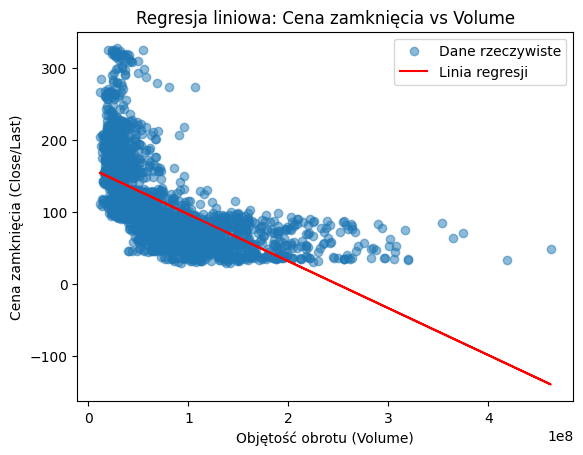

In [36]:
# Wizualizacja regresji
plt.scatter(data['Volume'], data['Close/Last'], alpha=0.5, label="Dane rzeczywiste")
plt.plot(data['Volume'], model.predict(x), color='red', label="Linia regresji")
plt.xlabel("Objętość obrotu (Volume)")
plt.ylabel("Cena zamknięcia (Close/Last)")
plt.title("Regresja liniowa: Cena zamknięcia vs Volume")
plt.legend()
plt.show()

In [37]:
# Test normalności Shapiro-Wilka
stat_shapiro, p_value_shapiro = shapiro(data['Close/Last'])
print(f"\nTest Shapiro-Wilka:\nStatystyka: {stat_shapiro}, p-wartość: {p_value_shapiro}")


Test Shapiro-Wilka:
Statystyka: 0.9264905746486384, p-wartość: 1.8549724107893286e-33
